In [55]:


import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from geopy.geocoders import Nominatim
import folium
from opencage.geocoder import OpenCageGeocode





In [56]:

file_path = 'arxiv-metadata-oai-snapshot.json'
data = pd.read_json(file_path, lines=True, nrows=5000)

In [57]:

print(data.head())  

         id           submitter  \
0  704.0001      Pavel Nadolsky   
1  704.0002        Louis Theran   
2  704.0003         Hongjun Pan   
3  704.0004        David Callan   
4  704.0005  Alberto Torchinsky   

                                             authors  \
0  C. Bal\'azs, E. L. Berger, P. M. Nadolsky, C.-...   
1                    Ileana Streinu and Louis Theran   
2                                        Hongjun Pan   
3                                       David Callan   
4           Wael Abu-Shammala and Alberto Torchinsky   

                                               title  \
0  Calculation of prompt diphoton production cros...   
1           Sparsity-certifying Graph Decompositions   
2  The evolution of the Earth-Moon system based o...   
3  A determinant of Stirling cycle numbers counts...   
4  From dyadic $\Lambda_{\alpha}$ to $\Lambda_{\a...   

                                  comments  \
0  37 pages, 15 figures; published version   
1    To appear in Graph

In [58]:

data.dropna(inplace=True)  

In [59]:

data.drop_duplicates(subset=['title'], inplace=True)

In [60]:
text = ' '.join(data['title'])  

In [61]:
print(data.head()) 

           id            submitter  \
7    704.0008         Damian Swift   
376  704.0377  Vladimir Pascalutsa   
629  704.0630     Evgeni Solodov P   
928  704.0929       Hyun Seok Yang   
944  704.0945      Peter McCullagh   

                                               authors  \
7                                      Damian C. Swift   
376  Daniele Binosi (ECT*, Trento), Vladimir Pascal...   
629          The BABAR Collaboration: B. Aubert, et al   
928                                     Hyun Seok Yang   
944       Peter McCullagh, Jim Pitman, Matthias Winkel   

                                                 title  \
7    Numerical solution of shock and ramp compressi...   
376  The lifetime of unstable particles in electrom...   
629  The $e^+ e^-\to K^+ K^- \pi^+\pi^-$, $K^+ K^- ...   
928  Noncommutative Electromagnetism As A Large N G...   
944                          Gibbs fragmentation trees   

                                              comments  \
7              

In [62]:

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)


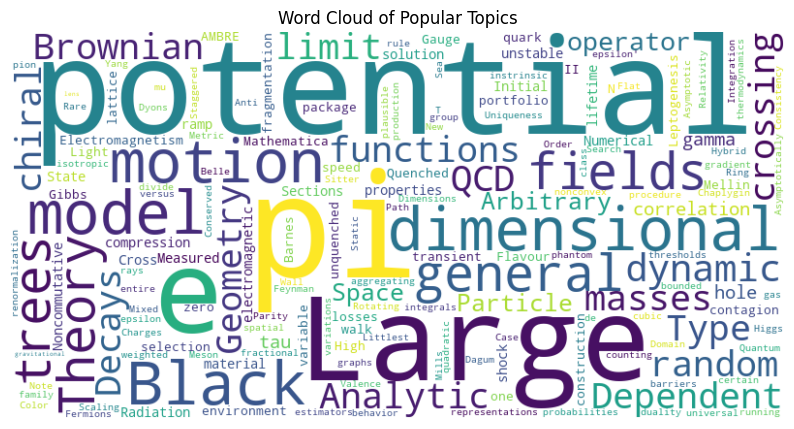

In [63]:

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Popular Topics')
plt.show()

In [65]:

data['year'] = pd.to_datetime(data['update_date']).dt.year

In [66]:

publication_counts = data['year'].value_counts().sort_index()

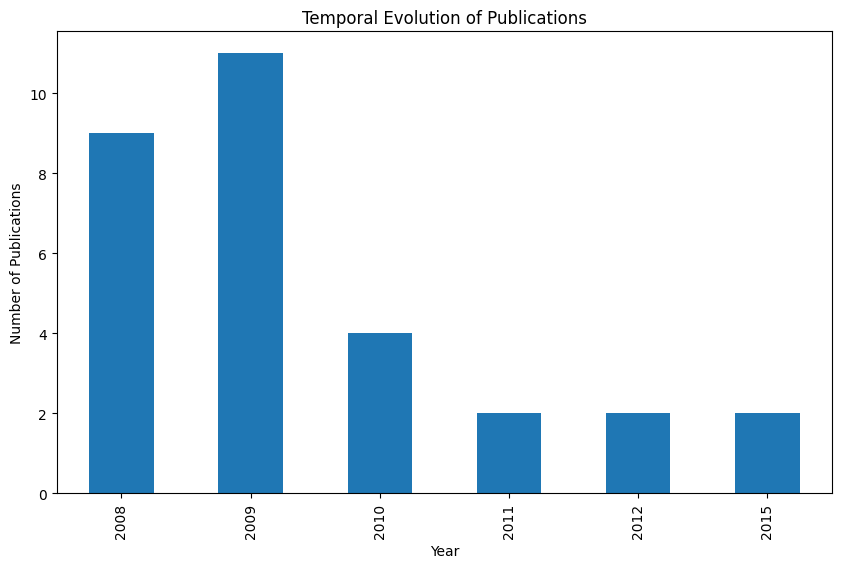

In [67]:

plt.figure(figsize=(10, 6))
publication_counts.plot(kind='bar')
plt.title('Temporal Evolution of Publications')
plt.xlabel('Year')
plt.ylabel('Number of Publications')
plt.show()

In [80]:

if 'author_country' in data.columns:
    contributions_per_location = data['author_country'].value_counts()
else:
    
    def extract_country(authors):
        
        return authors[0].split()[-1] if authors else 'Unknown'
    
    data['author_country'] = data['authors'].apply(extract_country)
    contributions_per_location = data['author_country'].value_counts()

In [81]:

API_KEY = '1bdb05ead8944af2919fd2da4025979a'  
geocoder = OpenCageGeocode(API_KEY)

In [82]:

m = folium.Map(location=[0, 0], zoom_start=2)

In [76]:

geolocator = Nominatim(user_agent="geoapiExercises")

In [83]:

for location, contributions in contributions_per_location.items():
    result = geocoder.geocode(location)
    if result:
        latitude = result[0]['geometry']['lat']
        longitude = result[0]['geometry']['lng']
        
        folium.CircleMarker(
            location=[latitude, longitude],
            radius=contributions / 10,  
            color='blue',
            fill=True,
            fill_color='blue',
            fill_opacity=0.7,
            popup=f"{location}: {contributions} contributions"
        ).add_to(m)

In [86]:


m.save('data_contributions_map.html')
m